<h1>Tensor Network Space-Time Spectral Collocation Method for Solving the Nonlinear Convection Diffusion Equation</h1>

Dibyendu Adak, M. Engin Danis, Duc P. Truong, Kim Ø. Rasmussen & Boian S. Alexandrov 

http://link.springer.com/article/10.1007/s10915-025-02860-x

In [2]:
addpath(genpath('../../matlab/Linear-STSC/src/'))
addpath(genpath('../../matlab/Non-linear-STSC/src/'))
addpath(genpath('../../matlab/utils/chebfun/'))
addpath(genpath('../../matlab/utils/tt-toolbox/'))
addpath(genpath('../../matlab/utils/ttfunc/'))

close all; clear; clc;

ans = 8

ans = 10

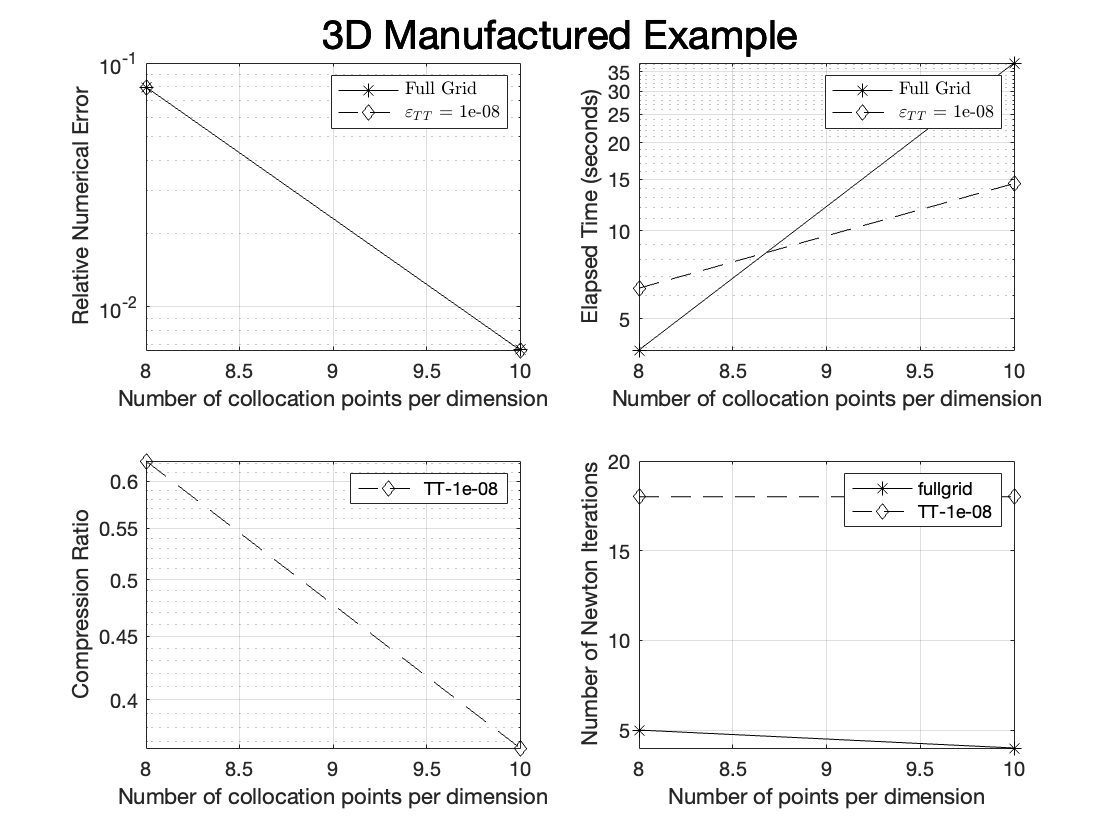

In [3]:

%% load results files

testname = "testcases/3D_manufactured_example";
exactrank = 1;
b = 2;

tol = 1e-8;
fgtol = 1e-5;

tolstr = num2str(tol);
fgtolstr = num2str(fgtol);

tempname = split(testname,'/');
fgdata = load(sprintf('plot_data/fg_%s.mat', tempname(end)));
ttdata = load(sprintf('plot_data/tt_%s.mat', tempname(end)));

%% 3 plots solution differences in rho
fgI = 1:2;%[1:numel(fgdata.Ns)];
ttI = 1:2;%[1:numel(ttdata.Ns)];

fgNs = fgdata.Ns(fgI);
ttNs = ttdata.Ns(ttI);

fgtime = cellfun(@(c) c.time, fgdata.R(fgI));
tttime = cellfun(@(c) c.time, ttdata.R(ttI));

fgerr = cellfun(@(c) c.err, fgdata.R(fgI));
tterr = cellfun(@(c) c.err, ttdata.R(ttI));

fgniter = cellfun(@(c) c.NewtonIter, fgdata.R(fgI));
ttniter = cellfun(@(c) c.NewtonIter, ttdata.R(ttI));

[comprate,numelement] = cellfun(@(c) compress_ratio_tt(c.sol), ttdata.R(ttI));

for i = 1:numel(ttNs)
  ttNs(i)
  trncsol = round(ttdata.R{i,1}.sol,min(ttdata.R{i,1}.err,1));
  exactcompression(i) = compress_ratio_tt(tt_rand(trncsol.n,4,exactrank));
  % trncsol.r
  trunccomp(i) = compress_ratio_tt(trncsol);
end


%%

fgmrk = '-*k';
ttmrk = '--dk';
tttrmrk = '--ok';
figure()
subplot(2,2,1)
grid on;
hold on;
plot(fgNs,fgerr,fgmrk)
plot(ttNs,tterr,ttmrk)

xlabel(sprintf('Number of collocation points per dimension', Interpreter='latex'))
ylabel(sprintf('Relative Numerical Error',Interpreter='latex'))
set(gca, 'YScale','log')
legend('Full Grid',sprintf('$\\varepsilon_{TT}$ = %s',tolstr), ...
  Interpreter='latex')
box on;

subplot(2,2,2) % grid size vs time
grid on;
hold on;
plot(fgNs,fgtime,fgmrk,'DisplayName','');
plot(ttNs,tttime,ttmrk,'DisplayName','');

xlabel(sprintf('Number of collocation points per dimension', Interpreter='latex'))
ylabel('Elapsed Time (seconds)')
legend('Full Grid',sprintf('$\\varepsilon_{TT}$ = %s',tolstr),...
  Interpreter='latex')
set(gca, 'YScale','log')
box on;

%%%% compression plot
subplot(2,2,3) % grid size vs time
grid on;
hold on;
plot(ttNs,comprate,ttmrk)
xlabel(sprintf('Number of collocation points per dimension', Interpreter='latex'))
ylabel('Compression Ratio')
set(gca, 'YScale','log')
legend(sprintf('TT-%s',tolstr))
box on;

%%% Newton Iter plot
subplot(2,2,4)
grid on;
hold on;
plot(fgNs,fgniter,fgmrk)
plot(ttNs,ttniter,ttmrk)

xlabel(sprintf('Number of points per dimension', Interpreter='latex'))
ylabel(sprintf('Number of Newton Iterations',Interpreter='latex'))
legend('fullgrid',sprintf('TT-%s',tolstr))
box on;

sgt = sgtitle("3D Manufactured Example");
sgt.FontSize = 20;

